In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import numpy as np
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# EDA Process (Explotary Data Analysis)

####  Reading the data, understanding data and checking Null and duplicated values

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS BIA/obesity_data.csv")

In [ ]:
# shows the first 5 rows of your dataset
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [ ]:
# shows the last 5 rows of your dataset
df.tail()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight
999,66,Female,178.537130,74.962164,23.517168,1,Normal weight


In [ ]:
# Total No of Rows and Column
df.shape

(1000, 7)

In [ ]:
# Show all the column info like total rows how many null value are there and its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [ ]:
# finding missing values
df.isna().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [ ]:
# finding duplicates values
df.duplicated().sum()

0

In [ ]:
unique=df.select_dtypes(include=object).nunique()

In [ ]:
print(unique)

Gender             2
ObesityCategory    4
dtype: int64


In [ ]:
df["Gender"].value_counts()

Male      523
Female    477
Name: Gender, dtype: int64

In [ ]:
# shows total Number of value of a column Data is balanced
df['ObesityCategory'].value_counts()

Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: ObesityCategory, dtype: int64

In [ ]:
# show in percentage
df['ObesityCategory'].value_counts()/df.shape[0]*100

Normal weight    37.1
Overweight       29.5
Obese            19.1
Underweight      14.3
Name: ObesityCategory, dtype: float64

In [ ]:
# summary statistics of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.857000,18.114267,18.000000,35.000000,50.000000,66.000000,79.000000
Height,1000.0,170.052417,10.309971,136.115719,163.514205,169.801665,177.353596,201.419670
Weight,1000.0,71.205769,15.509849,26.065730,61.129629,71.929072,81.133746,118.907366
BMI,1000.0,24.888317,6.193912,8.470572,20.918068,24.698647,28.732132,50.791898
PhysicalActivityLevel,1000.0,2.534000,1.116284,1.000000,2.000000,3.000000,4.000000,4.000000


In [ ]:
# Show the stastics of categorial value
df.describe(include=object).T

,count,unique,top,freq
Gender,1000,2,Male,523
ObesityCategory,1000,4,Normal weight,371


#### Data Visualization to Understand the spread of data

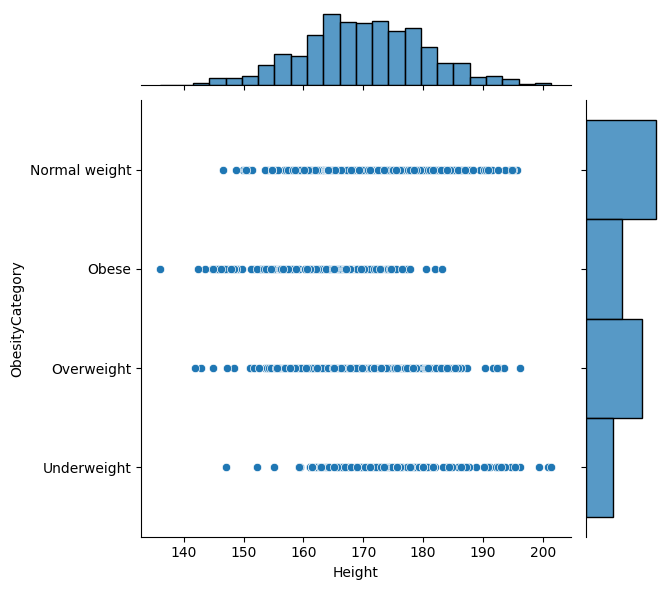

In [ ]:
sns.jointplot(data=df,x="Height",y="ObesityCategory")

In [ ]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [ ]:
spread=['Age','Height', 'Weight', 'BMI']

In [ ]:
# using distplot to see how distribution and count of data is spread if you dont want to see distribution in distplot use kde=False
# but in histplot also you can see distribution use kde=True
# for i in spread:
#   plt.figure(figsize=(10,6))
#   dist=sns.distplot(df[i],bins=10,color='blue')
#   plt.show()
#   print(dist)

In [ ]:
df_corr=df.select_dtypes(include=['int64', 'float64']).corr()

In [ ]:
df_corr

,Age,Height,Weight,BMI,PhysicalActivityLevel
Age,1.000000,0.019647,-0.061400,-0.059971,-0.022308
Height,0.019647,1.000000,0.016033,-0.477091,0.030380
Weight,-0.061400,0.016033,1.000000,0.861438,0.063406
BMI,-0.059971,-0.477091,0.861438,1.000000,0.038020
PhysicalActivityLevel,-0.022308,0.030380,0.063406,0.038020,1.000000


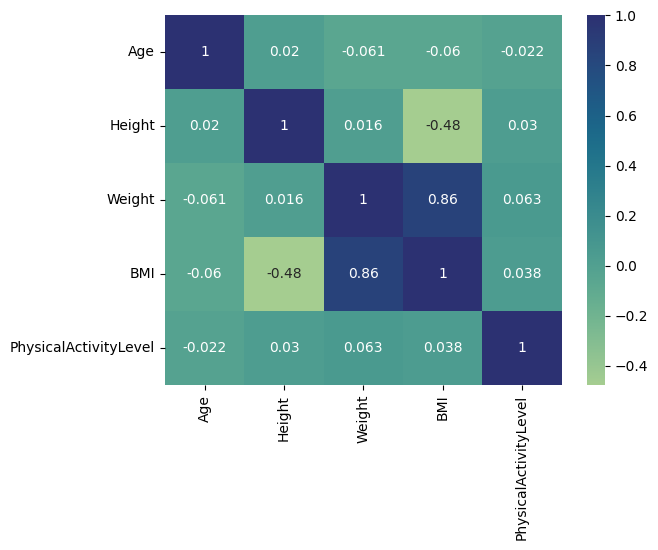

In [ ]:
sns.heatmap(df_corr,annot=True,cmap="crest")
plt.show()

In [ ]:
# There is a good relation between BMI and Weight as the BMI increase Weight will increase

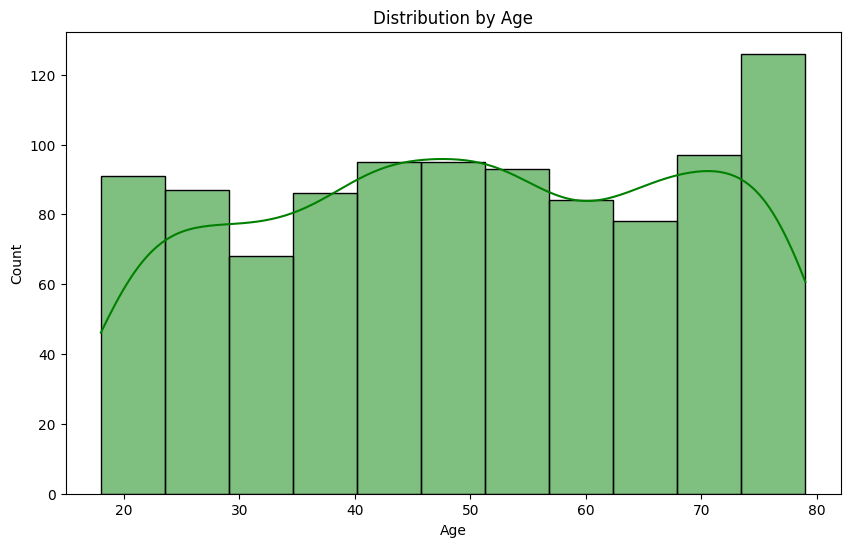

Axes(0.125,0.11;0.775x0.77)


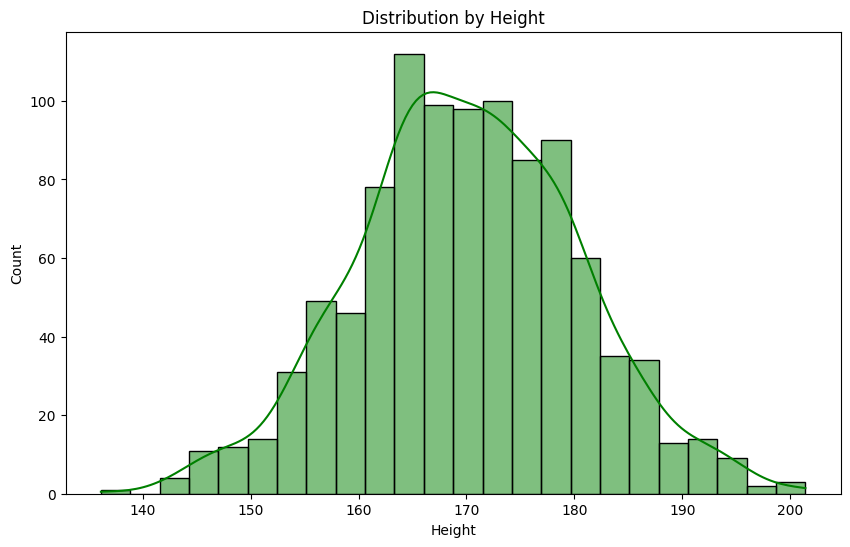

Axes(0.125,0.11;0.775x0.77)


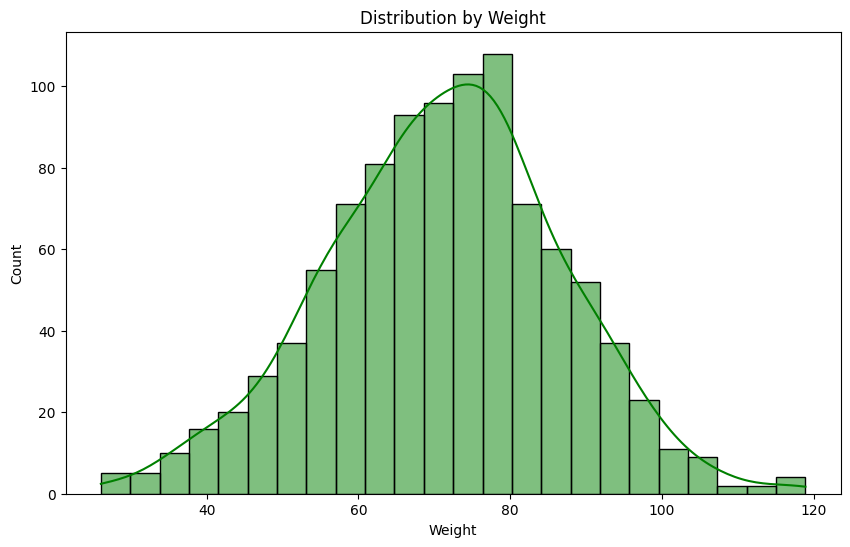

Axes(0.125,0.11;0.775x0.77)


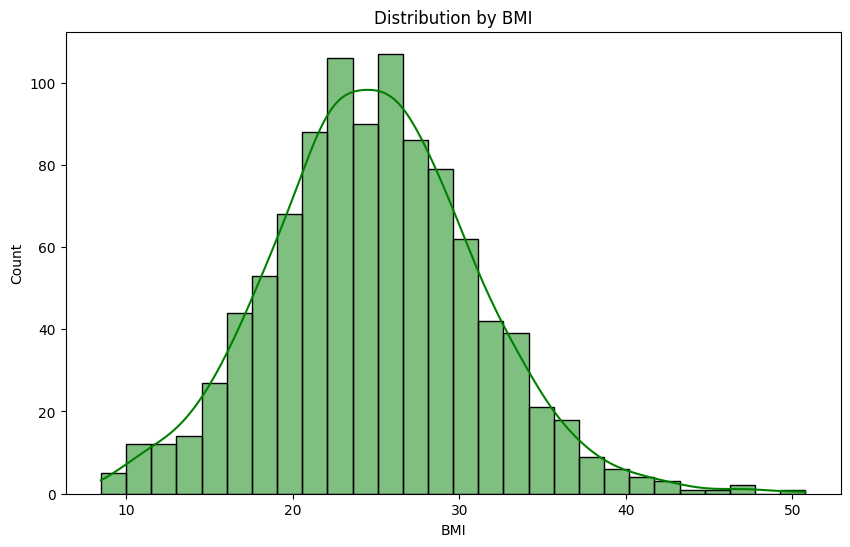

Axes(0.125,0.11;0.775x0.77)


In [ ]:
for i in spread:
  plt.figure(figsize=(10,6))
  hist=sns.histplot(data=df[i],color='green',kde=True)
  plt.title(f"Distribution by {i}")
  plt.xlabel(i)
  plt.show()
  print(hist)

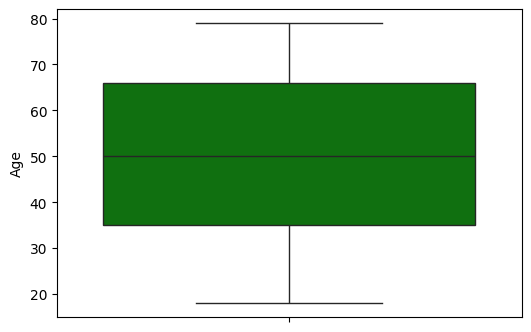

Axes(0.125,0.11;0.775x0.77)


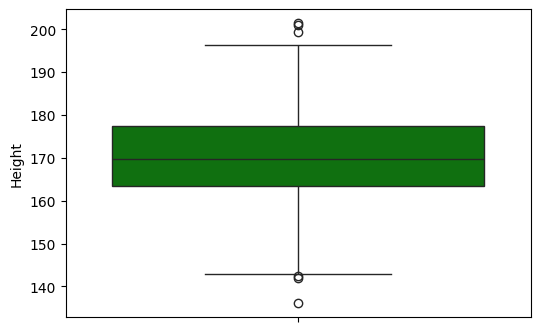

Axes(0.125,0.11;0.775x0.77)


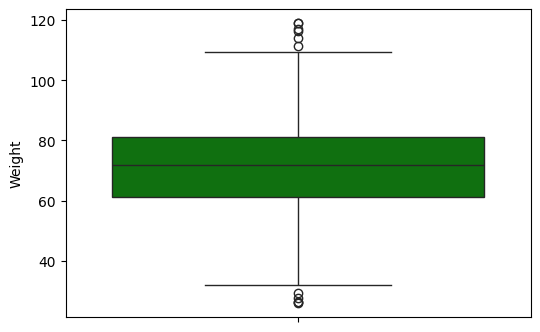

Axes(0.125,0.11;0.775x0.77)


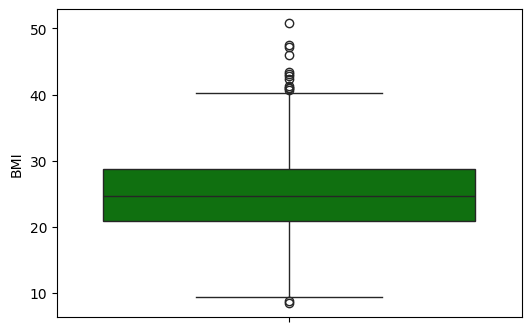

Axes(0.125,0.11;0.775x0.77)


In [ ]:
for col in spread:
  plt.figure(figsize=(6,4))
  outliers=sns.boxplot(df[col],color="green")
  plt.show()
  print(outliers)

Text(0.5, 1.0, 'Age distribution by Obesity Category')

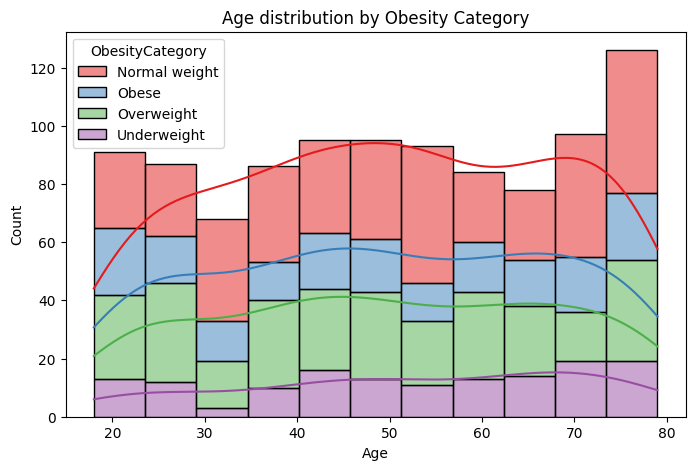

In [ ]:
# Age Distribution by Obesity Category
plt.figure(figsize=(8,5))
sns.histplot(data=df,x="Age",hue="ObesityCategory",palette="Set1",kde=True,multiple='stack')
plt.xlabel("Age")
plt.title("Age distribution by Obesity Category")

<ipython-input-28-f9851ebc8d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="ObesityCategory",y="Age",palette="Set2")


Text(0.5, 1.0, 'Age Distribution by Obesity category')

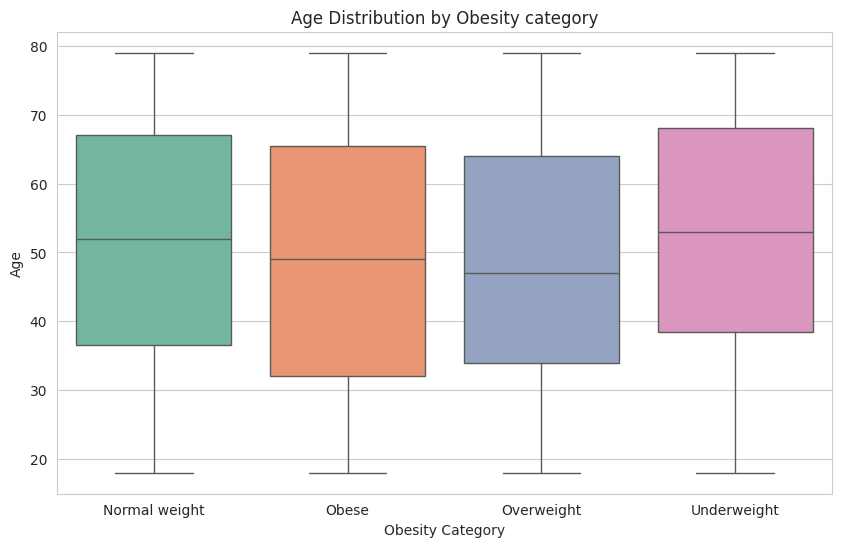

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="ObesityCategory",y="Age",palette="Set2")
plt.xlabel('Obesity Category')
plt.ylabel('Age')
plt.title("Age Distribution by Obesity category")

Text(0.5, 1.0, 'Height distribution by Obesity Category')

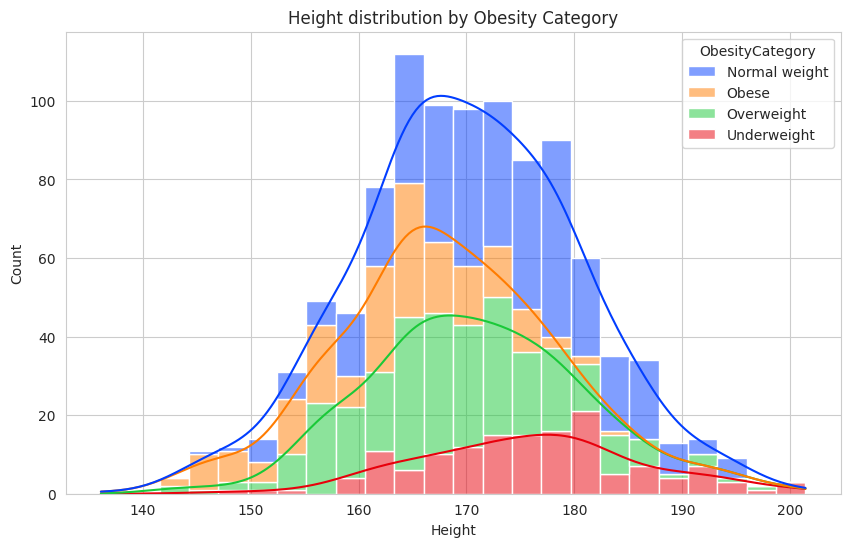

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Height",hue="ObesityCategory",kde=True,multiple="stack",palette="bright")
plt.xlabel("Height")
plt.title("Height distribution by Obesity Category")

<ipython-input-30-f0331e6c6a61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y="Height",x="ObesityCategory",palette="rocket")


Text(0.5, 1.0, 'Height Distribution by Obesity category')

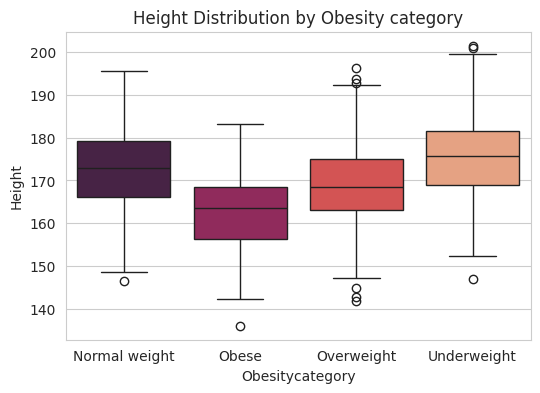

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y="Height",x="ObesityCategory",palette="rocket")
plt.xlabel("Obesitycategory")
plt.ylabel("Height")
plt.title("Height Distribution by Obesity category")

Text(0.5, 1.0, 'Weight Disrtibutiob by Obesity Category')

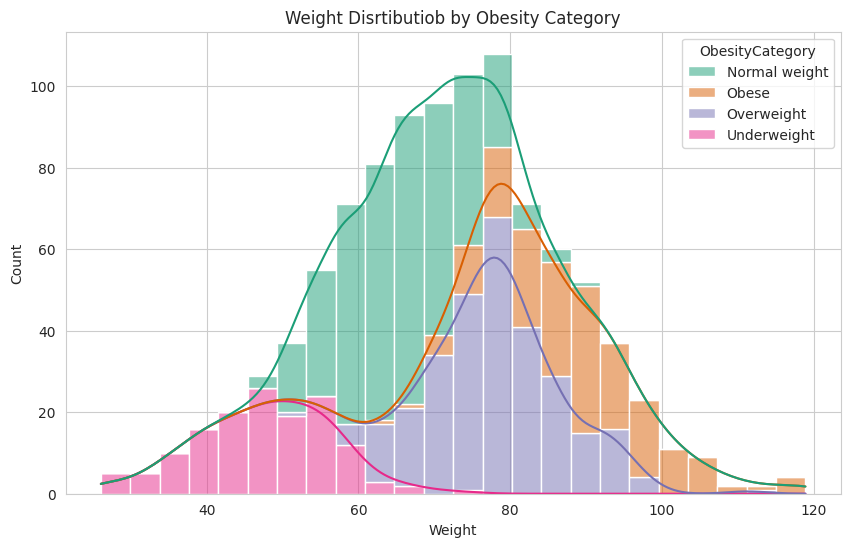

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x="Weight",hue="ObesityCategory",data=df,kde=True,multiple="stack",palette="Dark2")
plt.title("Weight Disrtibutiob by Obesity Category")

<ipython-input-32-661c9a1c952b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y="Weight",x="ObesityCategory",palette="colorblind")


Text(0.5, 1.0, 'Weight Distribution by Category')

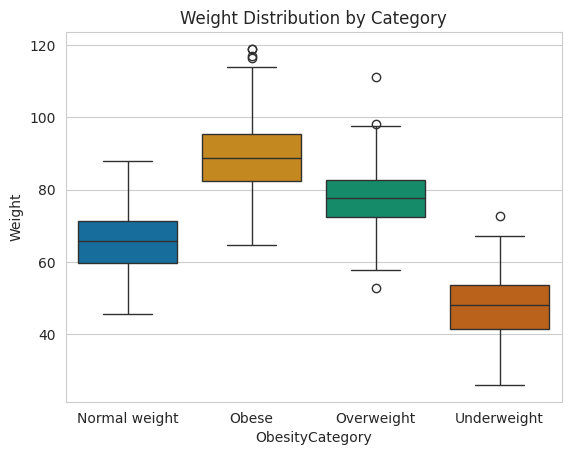

In [ ]:
sns.boxplot(data=df,y="Weight",x="ObesityCategory",palette="colorblind")
plt.title("Weight Distribution by Category")

Text(0.5, 1.0, 'BMI distribution by Obesity Category')

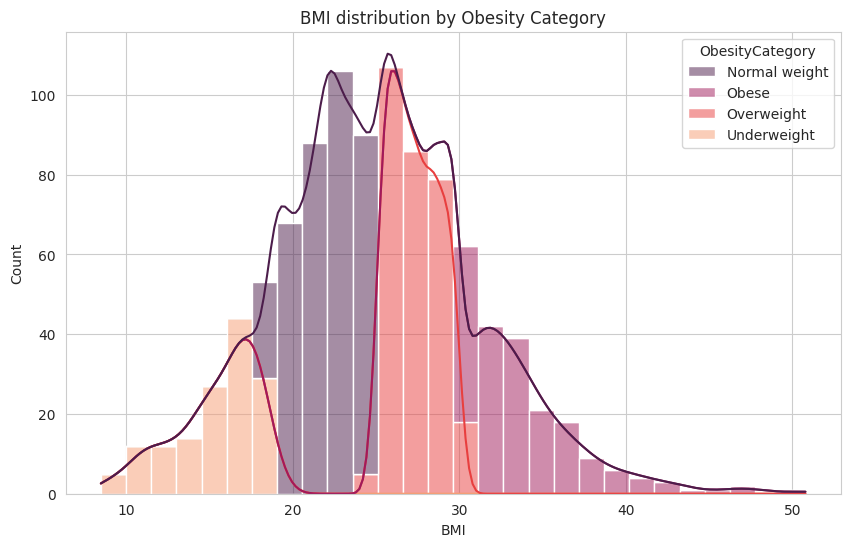

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="BMI",hue="ObesityCategory",multiple="stack",palette="rocket",kde=True)
plt.title("BMI distribution by Obesity Category")

Text(0.5, 1.0, 'BMI distribution by Category')

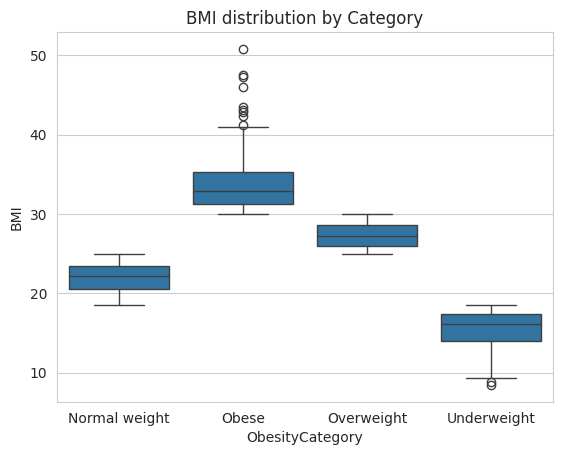

In [ ]:
sns.boxplot(data=df,x="ObesityCategory",y="BMI")
plt.title("BMI distribution by Category")

<ipython-input-35-2f709ba3d11d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Total=sns.countplot(df[i],palette='viridis',width=0.4)


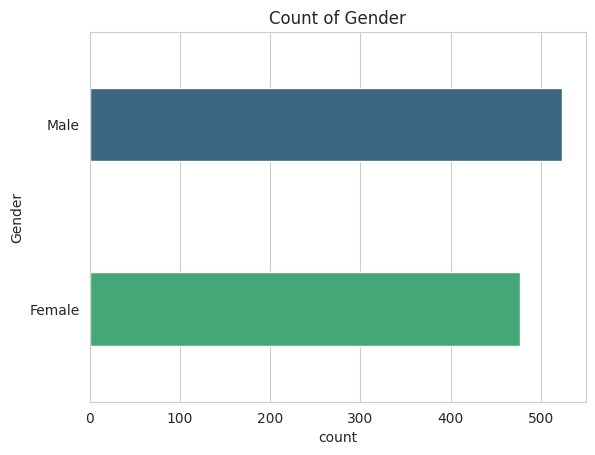

Axes(0.125,0.11;0.775x0.77)


<ipython-input-35-2f709ba3d11d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Total=sns.countplot(df[i],palette='viridis',width=0.4)


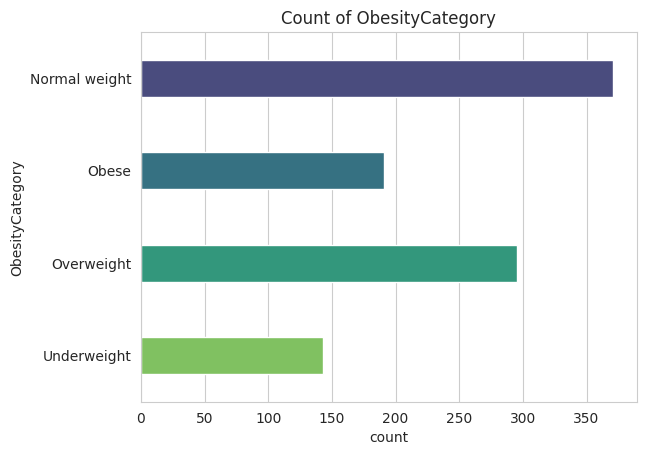

Axes(0.125,0.11;0.775x0.77)


In [ ]:
count=['Gender','ObesityCategory']
for i in count:
  Total=sns.countplot(df[i],palette='viridis',width=0.4)
  plt.title(f"Count of {i}")
  plt.show()
  print(Total)

Text(0.5, 1.0, 'Total Obesity Category by gender')

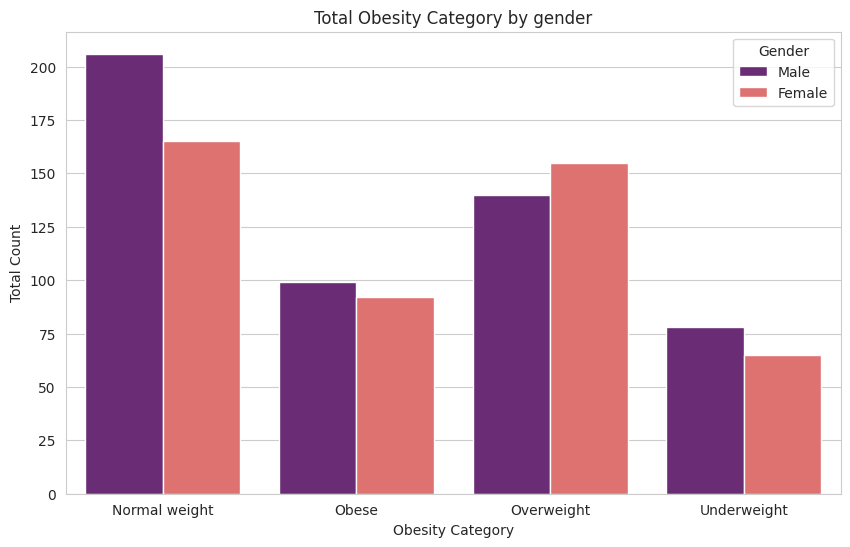

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,hue="Gender",x="ObesityCategory",palette="magma")
plt.xlabel("Obesity Category")
plt.ylabel("Total Count")
plt.title("Total Obesity Category by gender")

#### Handling outliers (value more than IQR is outliers)

In [ ]:
# By using Boxplot we had identify that we had oultiers in Height Weight and BMI
# To see the value of Outliers we need to use IQR
# No outliers in Age column

In [ ]:
df["Age"]=df["Age"].astype("int")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.857000,18.114267,18.000000,35.000000,50.000000,66.000000,79.000000
Height,1000.0,170.052417,10.309971,136.115719,163.514205,169.801665,177.353596,201.419670
Weight,1000.0,71.205769,15.509849,26.065730,61.129629,71.929072,81.133746,118.907366
BMI,1000.0,24.888317,6.193912,8.470572,20.918068,24.698647,28.732132,50.791898
PhysicalActivityLevel,1000.0,2.534000,1.116284,1.000000,2.000000,3.000000,4.000000,4.000000


In [ ]:
# Q1=df["Height"].quantile(0.25)
# Q3=df["Height"].quantile(0.75)

# IQR=Q3-Q1
# print(IQR)

# LL=Q1 - 1.5*  IQR
# UL=Q3 + 1.5 * IQR
# LL,UL

# df[(df.Height<LL) | (df.Height>UL)]

In [ ]:
col=["Height","Weight","BMI"]
for name in col:
  Q1=df[name].quantile(0.25)
  Q3=df[name].quantile(0.75)
  print(f"{name} percentile")
  print(f"25th percentile is {Q1} 75th percentile is {Q3} ")
  IQR=Q3-Q1
  LL=Q1 - 1.5*  IQR
  UL=Q3 + 1.5 * IQR
  print(f"IQR of {name} {IQR}" )
  print(f"Range of Normal values {LL,UL}")
  print()

Outliers=(df[(df[name]<LL) | (df[name]>UL)])


Height percentile
25th percentile is 163.514204575 75th percentile is 177.35359565000002 
IQR of Height 13.839391075000009
Range of Normal values (142.75511796249998, 198.11268226250002)

Weight percentile
25th percentile is 61.129628935 75th percentile is 81.13374577 
IQR of Weight 20.004116835000005
Range of Normal values (31.123453682499992, 111.1399210225)

BMI percentile
25th percentile is 20.91806802 75th percentile is 28.732131907499998 
IQR of BMI 7.814063887499998
Range of Normal values (9.196972188750003, 40.453227738749995)



In [ ]:
# This data are outliers in our dataset
Outliers

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
22,19,Male,143.527471,83.796214,40.677507,2,Obese
37,66,Female,149.147824,95.299588,42.840761,4,Obese
134,26,Male,152.949133,118.819709,50.791898,2,Obese
263,49,Male,146.753207,91.255657,42.372549,2,Obese
311,22,Female,145.448750,99.868789,47.207369,2,Obese
368,79,Male,201.419670,34.365010,8.470572,1,Underweight
507,34,Female,145.314571,87.116991,41.255755,2,Obese
529,62,Male,136.115719,85.166147,45.967452,2,Obese
591,73,Male,157.617043,107.856997,43.415217,2,Obese
604,70,Female,145.682864,91.366930,43.049894,4,Obese


In [ ]:
Total=len(Outliers)

In [ ]:
print("Total Outliers in our dataset is ",Total)

Total Outliers in our dataset is  14


In [ ]:
# we have identify 14 outliers in our dataset but as dataset is small so let try withour removing outliers how much accuracy will be
# with help of using  standarization scaling

#### converting categorial to numeric

In [ ]:
df[["Gender","ObesityCategory"]]=df[["Gender","ObesityCategory"]].apply(LabelEncoder().fit_transform)

#### Train test split

In [ ]:
# Independent Variables in X and dependent in Y
X=df.drop(columns={"ObesityCategory"})
y=df["ObesityCategory"]

In [ ]:
print(X) # 1 is Male and 0 is Female

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel
0     56       1  173.575262  71.982051  23.891783                      4
1     69       1  164.127306  89.959256  33.395209                      2
2     46       0  168.072202  72.930629  25.817737                      4
3     32       1  168.459633  84.886912  29.912247                      3
4     60       1  183.568568  69.038945  20.487903                      3
..   ...     ...         ...        ...        ...                    ...
995   18       1  155.588674  64.103182  26.480345                      4
996   35       0  165.076490  97.639771  35.830783                      1
997   49       0  156.570956  78.804284  32.146036                      1
998   64       1  164.192222  57.978115  21.505965                      4
999   66       0  178.537130  74.962164  23.517168                      1

[1000 rows x 6 columns]


In [ ]:
print(y)
# 0 is Normal Weight, 1 is Obese, 2 is Over Weight, 3 is Under Weight

0      0
1      1
2      2
3      2
4      0
      ..
995    2
996    1
997    1
998    0
999    0
Name: ObesityCategory, Length: 1000, dtype: int64


In [ ]:
y.value_counts() # data is divided into 37.1%,29.5%,19.1%,14.3% (i.e Normal Weight,Obese,Overweigt,Underweight)

0    371
2    295
1    191
3    143
Name: ObesityCategory, dtype: int64

In [ ]:
y.nunique() #0,1,2,3

4

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

print(f" Total Data of X is {X.shape}\n 80% for Training data {X_train.shape}\n 20% for Testing,{X_test.shape}")

 Total Data of X is (1000, 6)
 80% for Training data (800, 6)
 20% for Testing,(200, 6)


#### Feature scaling(Standard scaling)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Model Selection

#### 1) Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
naivebayes=GaussianNB()

In [ ]:
naivebayes.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred=naivebayes.predict(X_test_scaled)

In [ ]:
y_pred

array([1, 3, 2, 1, 1, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 0, 1, 2, 0, 3, 1, 0,
       2, 1, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 3, 2, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 3, 3, 1, 2, 0, 0, 3, 3,
       2, 2, 0, 3, 1, 2, 3, 1, 1, 0, 3, 0, 3, 3, 0, 3, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 3, 2, 1, 0, 2, 2, 0, 2, 3, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 0, 3, 3, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0,
       3, 0, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       3, 0, 0, 2, 0, 0, 3, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 3, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2])

In [ ]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [ ]:
# Evaluation

In [ ]:
accuracy_nb=accuracy_score(y_test,y_pred) # Testing Accuracy

In [ ]:
print(accuracy_nb*100,"%")

95.0 %


In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[69,  0,  4,  1],
       [ 0, 37,  1,  0],
       [ 2,  1, 56,  0],
       [ 1,  0,  0, 28]])

Text(50.722222222222214, 0.5, 'True Value')

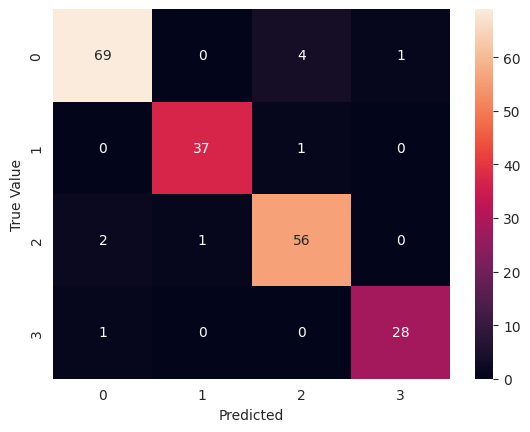

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [ ]:
Report_nb=classification_report(y_test,y_pred)
print(Report_nb)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.97      0.97      0.97        38
           2       0.92      0.95      0.93        59
           3       0.97      0.97      0.97        29

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
print("Nave Bayes Algorithm:",accuracy_score(y_test,y_pred)*100,'%')

Nave Bayes Algorithm: 95.0 %


### Naive Bayes with Cross Validation using Standard Scaler

In [ ]:
# Applying Standard Scaler in X,and using Cross validation

In [ ]:
X_scaled_cv = scaler.fit_transform(X)

In [ ]:
cv_score_nb=cross_val_score(GaussianNB(),X_scaled_cv,y,cv=10)

In [ ]:
cv_score_nb

array([0.99, 0.97, 0.94, 0.96, 0.91, 0.98, 0.97, 0.97, 0.93, 0.96])

In [ ]:
Naives_bayes_Cross_validation=cv_score_nb.mean()

In [ ]:
print("Nave Bayes Algorithm:",accuracy_score(y_test,y_pred)*100,'%')
print("Nave Bayes Algorithm with cross validation:",Naives_bayes_Cross_validation*100,'%')

Nave Bayes Algorithm: 95.0 %
Nave Bayes Algorithm with cross validation: 95.79999999999998 %


### 2) Support Vector Machine Classifier

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svc=svc.predict(X_test_scaled)

In [ ]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [ ]:
# Evaluation

In [ ]:
svc.score(X_test_scaled,y_test)

0.975

In [ ]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)

In [ ]:
print(accuracy_svc*100,"%")

97.5 %


In [ ]:
cm_svc=confusion_matrix(y_pred_svc,y_test)

Text(50.722222222222214, 0.5, 'True Value')

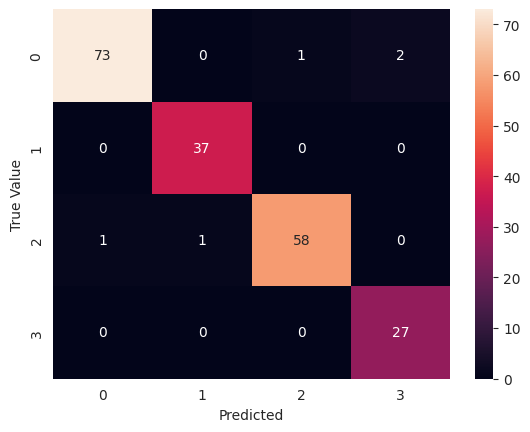

In [ ]:
sns.heatmap(data=cm_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [ ]:
print("SVM :",accuracy_svc*100,'%')

SVM : 97.5 %


In [ ]:
Report_svc=classification_report(y_test,y_pred_svc)
print(Report_svc)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       1.00      0.97      0.99        38
           2       0.97      0.98      0.97        59
           3       1.00      0.93      0.96        29

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Support Vector Machine with Cross validation using Standard Scaler

In [ ]:
cv_score_svc=cross_val_score(SVC(kernel='linear'),X_scaled_cv,y,cv=10)

In [ ]:
cv_score_svc

array([0.96, 0.99, 0.96, 0.98, 0.98, 0.99, 0.98, 0.96, 0.98, 0.99])

In [ ]:
SVM_cross_validation=cv_score_svc.mean()

In [ ]:
print("SVM Classifier:",SVM_cross_validation*100,'%')

SVM Classifier: 97.7 %


In [ ]:
print("SVM using kernel :",accuracy_svc*100,'%')
print("SVM Classifier with cross validation:",SVM_cross_validation*100,'%')

SVM using kernel : 97.5 %
SVM Classifier with cross validation: 97.7 %


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### 3) Decision Tree **Classifier**

In [ ]:
# Post pronning
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=2,ccp_alpha=0.005)

In [ ]:
# treemodel.fit(X_resampled,y_resampled)
treemodel.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.005, max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[4] <= 24.989\ngini = 0.718\nsamples = 1000\nvalue = [371, 191, 295, 143]'),
 Text(0.25, 0.5, 'x[4] <= 18.501\ngini = 0.402\nsamples = 514\nvalue = [371, 0, 0, 143]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 143\nvalue = [0, 0, 0, 143]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 371\nvalue = [371, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[4] <= 29.995\ngini = 0.477\nsamples = 486\nvalue = [0, 191, 295, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 295\nvalue = [0, 0, 295, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 191\nvalue = [0, 191, 0, 0]')]

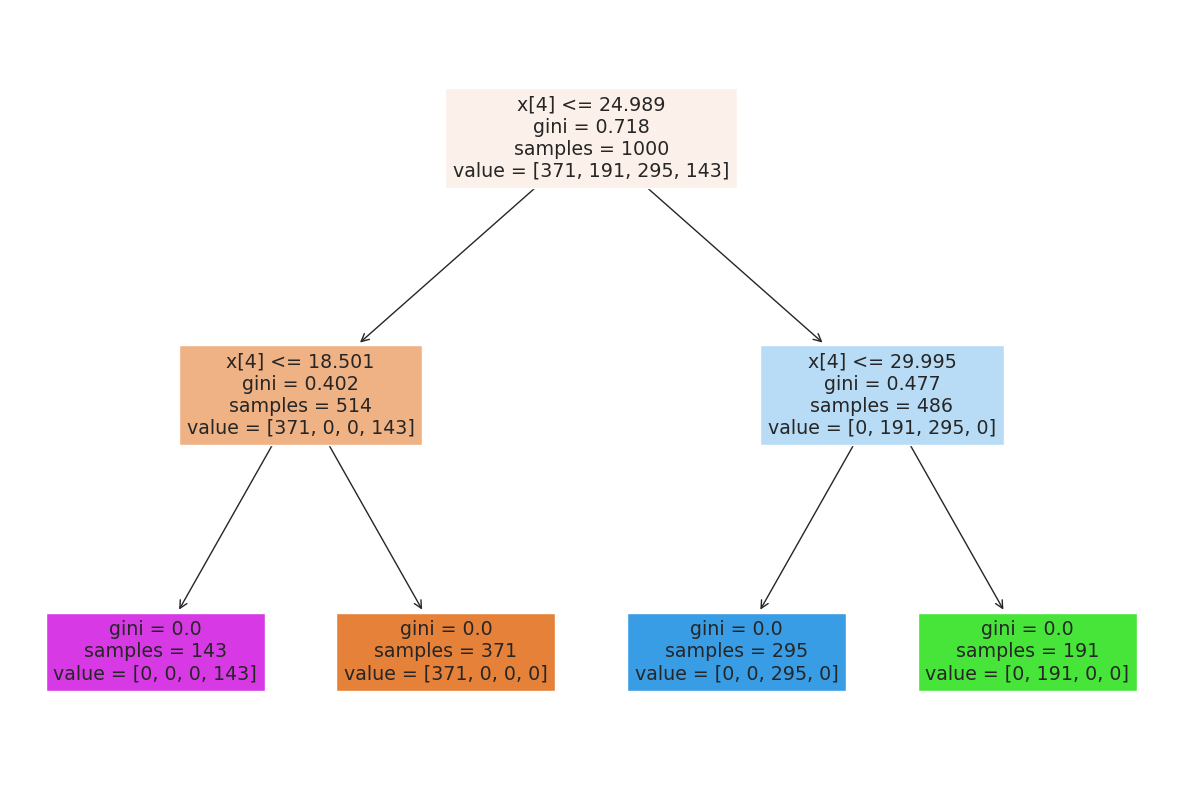

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred_treemodel=treemodel.predict(X_test)

In [ ]:
y_pred_treemodel

array([1, 3, 2, 1, 1, 2, 3, 0, 0, 3, 2, 1, 2, 1, 2, 0, 1, 2, 0, 3, 1, 0,
       2, 1, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 3, 2, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 3, 3, 1, 2, 0, 0, 3, 3,
       2, 2, 0, 3, 1, 2, 3, 1, 1, 0, 0, 0, 3, 3, 0, 3, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 3, 2, 1, 0, 2, 2, 0, 2, 3, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 3, 3, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0,
       3, 0, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       3, 0, 0, 2, 0, 0, 3, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 3, 0, 0, 3, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 0])

In [ ]:
y_test

869    1
449    3
823    2
813    1
764    1
      ..
282    0
725    2
109    2
848    0
718    0
Name: ObesityCategory, Length: 200, dtype: int64

In [ ]:
accuracy_treemodel=accuracy_score(y_test,y_pred_treemodel)

In [ ]:
print(accuracy_treemodel*100,"%")

100.0 %


In [ ]:
Report_treemodel=classification_report(y_test,y_pred_treemodel)

In [ ]:
print(Report_treemodel)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        29

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Decission Tree Classifier With cross Validation

In [ ]:
cv_score_treemodel=cross_val_score(DecisionTreeClassifier(max_depth=2,ccp_alpha=0.005),X,y,cv=20)

In [ ]:
cv_score_treemodel

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.96, 1.  , 1.  , 0.98, 1.  ,
       1.  , 1.  , 1.  , 0.98, 1.  , 1.  , 1.  , 1.  , 1.  ])

In [ ]:
cv_score_treemodel.mean()

0.9949999999999999

### Final Report

In [ ]:
final_Report=pd.DataFrame({'Models':["Naive Bayes","Support Vector","Decission Tree"],
                         "accuracy_score":[accuracy_nb*100,accuracy_svc*100,accuracy_treemodel*100],
                         })

final_Report

,Models,accuracy_score
0,Naive Bayes,95.0
1,Support Vector,97.5
2,Decission Tree,100.0


In [ ]:
print("Naive Bayes: \n",Report_nb)
print()
print("Support Vectors: \n",Report_svc)
print()
print("Decision Tree: \n",Report_treemodel)

Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.97      0.97      0.97        38
           2       0.92      0.95      0.93        59
           3       0.97      0.97      0.97        29

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.95      0.95      0.95       200


Support Vectors: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       1.00      0.97      0.99        38
           2       0.97      0.98      0.97        59
           3       1.00      0.93      0.96        29

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200


Decision Tree: 
               precision    recall  f1-score   support

           0       1.0